<a href="https://colab.research.google.com/github/ching-wong/my_notebooks/blob/main/Custom_Models_Layers_and_Loss_Functions_with_TensorFlow/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Models, Layers, and Loss Functions with TensorFlow - Week 1

How to use functional API to define a model, with multiple inputs and multiple outputs.

>[Course: Custom Models, Layers, and Loss Functions with TensorFlow - Week 1](#scrollTo=VqW8A7V0q51z)

>>[Sequential model revisited](#scrollTo=GpV1fDf9gXlP)

>>[Functional API example](#scrollTo=jUS86AXHiztO)

>>[Multiple outputs example](#scrollTo=P1A07HexwMKV)

>>[Multiple inputs example](#scrollTo=wjKr4Zgq_4sT)



## Sequential model revisited

When we define a sequential model, we add the layers one by one.
Here is a simple example.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_dense (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_dense (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

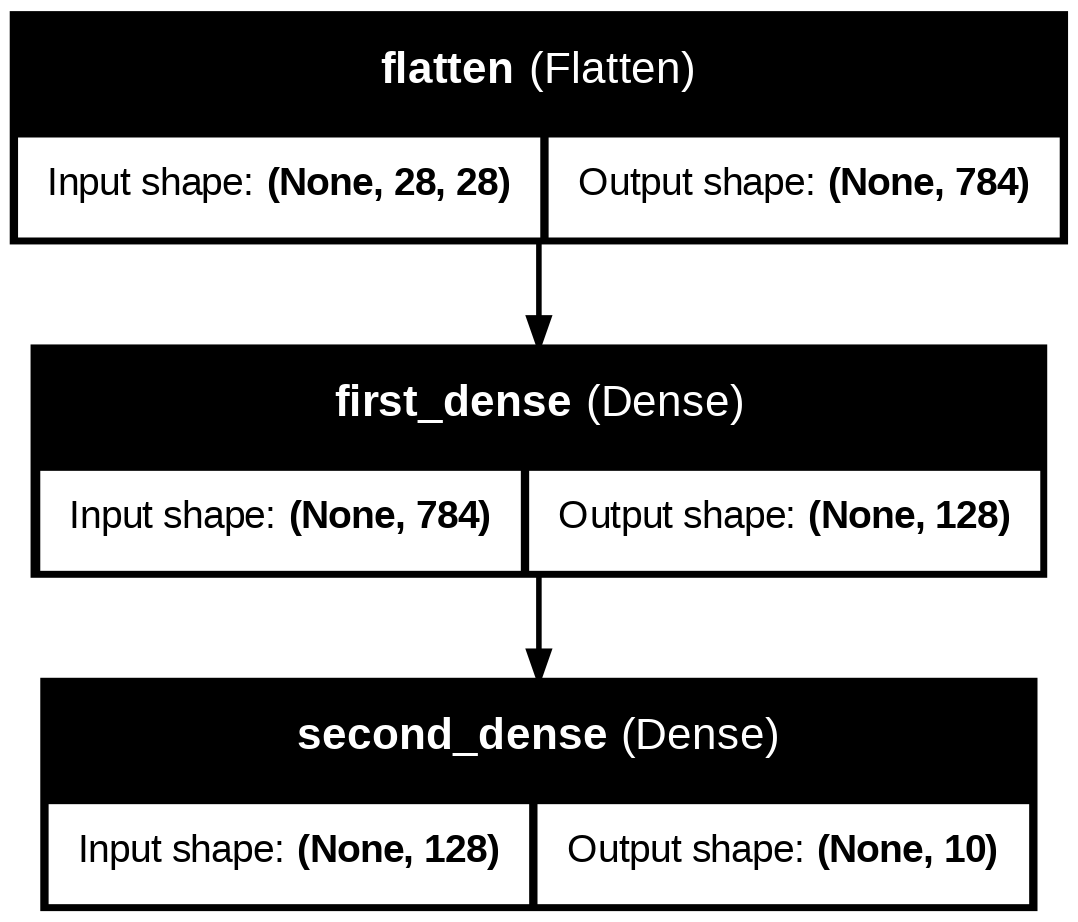

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

seq_model = Sequential()
seq_model.add(Input(shape=(28, 28), name="input"))
seq_model.add(Flatten(name="flatten"))
seq_model.add(Dense(128, activation='relu', name="first_dense"))
seq_model.add(Dense(10, activation='softmax', name="second_dense"))

seq_model.summary()

plot_model(seq_model, show_shapes=True, show_layer_names=True)

In this model:
*   The first layer has 784 = 28*28 neurons.
*   The second layer has 128 neurons (outputs) and 100480 = 128 * (784+1) parameters. Relu is added, i.e. negative outputs become 0.
*   The third layer has 10 neurons and 1290 = 10 * (128+1) parameters. Softmax is applied to the 10 values to get the probabilites:
$$\text{softmax}(z_i) = \dfrac{e^{z_i}}{\sum_j e^{z_j}}.$$



## Functional API example

Now we use functional API to define the same model.
There are 3 steps:

1.   Define input: input of the model
2.   Define layers: set of interconnected layers on the input
3.   Define model: define model using input and output layers

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_dense (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_dense (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

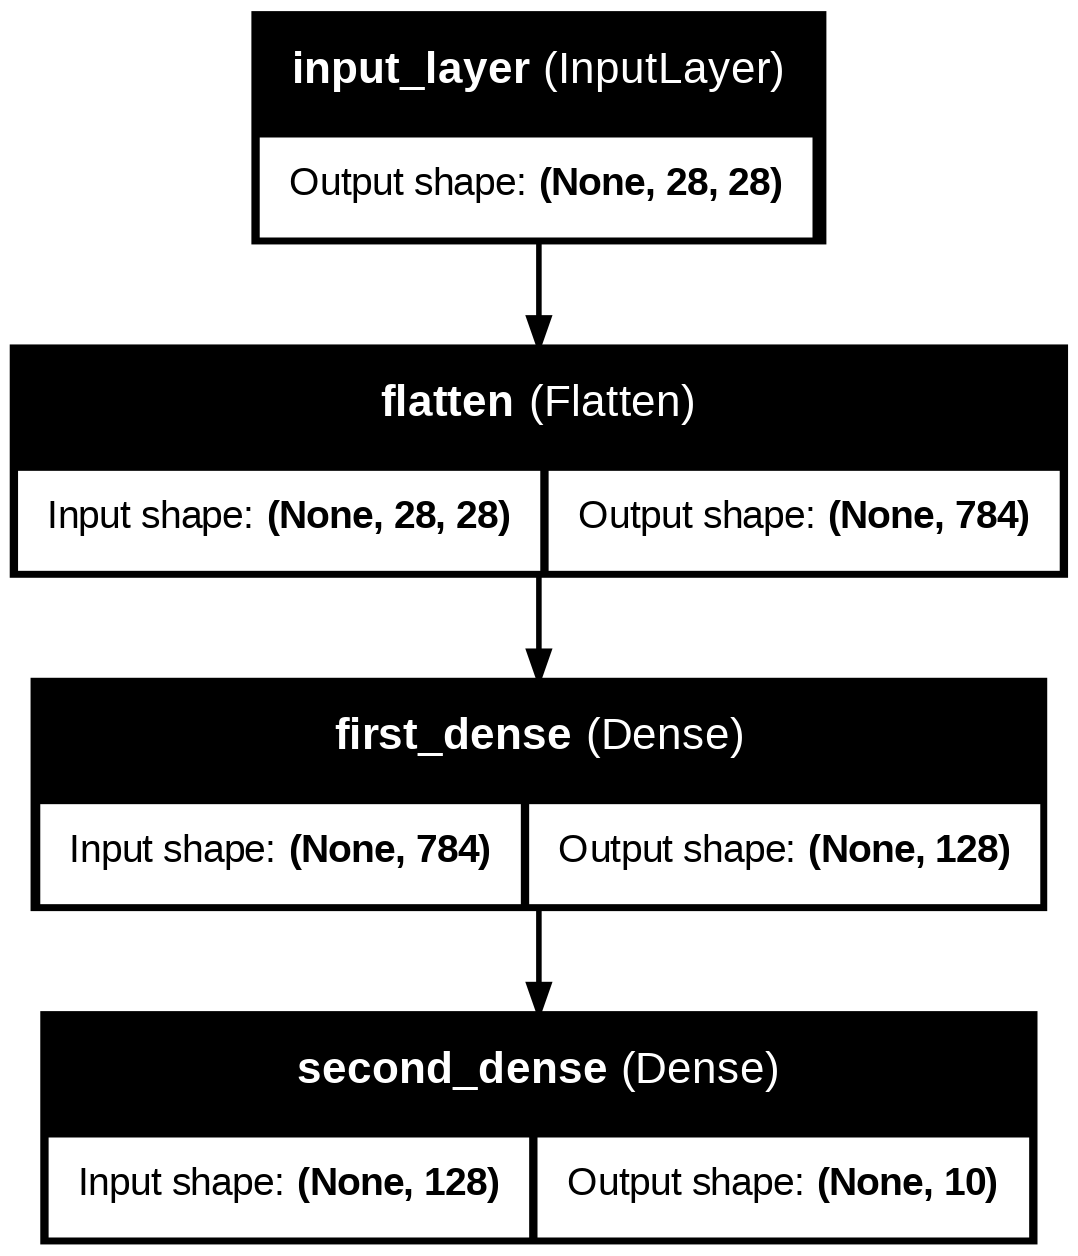

In [2]:
from tensorflow.keras.models import Model

input = Input(shape=(28, 28))

x = Flatten(name="flatten")(input)
x = Dense(128, activation="relu", name="first_dense")(x)
predictions = Dense(10, activation="softmax", name="second_dense")(x)

func_model = Model(inputs = input, outputs = predictions)

func_model.summary()

plot_model(func_model, show_shapes=True, show_layer_names=True)

To compile the model, there are 3 arguments to specify:

*   optimizer: how to update the model's weights during training.
    * SGD: performs updates using small batches of data.
    * RMSProp: adapts the learning rate based on recent gradients.
    * Adagrad: adjusts the learning rate for each parameter.
    * Adam: combines RMSProp and Adagrad.

*   loss: how far off the model's predictions are from the true values.
    * Sparse Categorical Crossentropy: for multi-class classification problems where the labels are provided as integers (e.g., 0, 1, 2, etc., instead of one-hot encoded vectors).
    * Categorical Crossentropy: similar to sparse categorical crossentropy but used when the labels are one-hot encoded.
    * cross-entropy: measures the difference between the predicted class probabilities (after applying softmax) and the true labels. It penalizes the model more when the prediction is far off from the true label.
    * Mean Squared Error (MSE): Used for regression problems (predicting continuous values).

*   metrics: how to evaluate the model's performance during training and testing.
    * accuracy: commonly used for classification problems. It calculates the percentage of correct predictions.

In [3]:
import tensorflow as tf

func_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#func_model.fit(training_images, training_labels, epochs=10)
#func_model.evaluate(test_images, test_labels)

## Multiple outputs example

Using functional syntax, one can create a model for multiple outputs.

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ first_dense (Dense)       │ (None, 128)            │        100,480 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ second_dense (Dense)      │ (None, 128)            │         16,512 │ first_dense[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ third_dense (Dense)       │ (None, 64)             │          8,256 │ second_dense[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output1 (Dense)           │ (None, 10)             │          1,290 │ second_dense[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output2 (Dense)           │ (None, 2)              │            130 │ third_dense[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 126,668 (494.80 KB)

 Trainable params: 126,668 (494.80 KB)

 Non-trainable params: 0 (0.00 B)

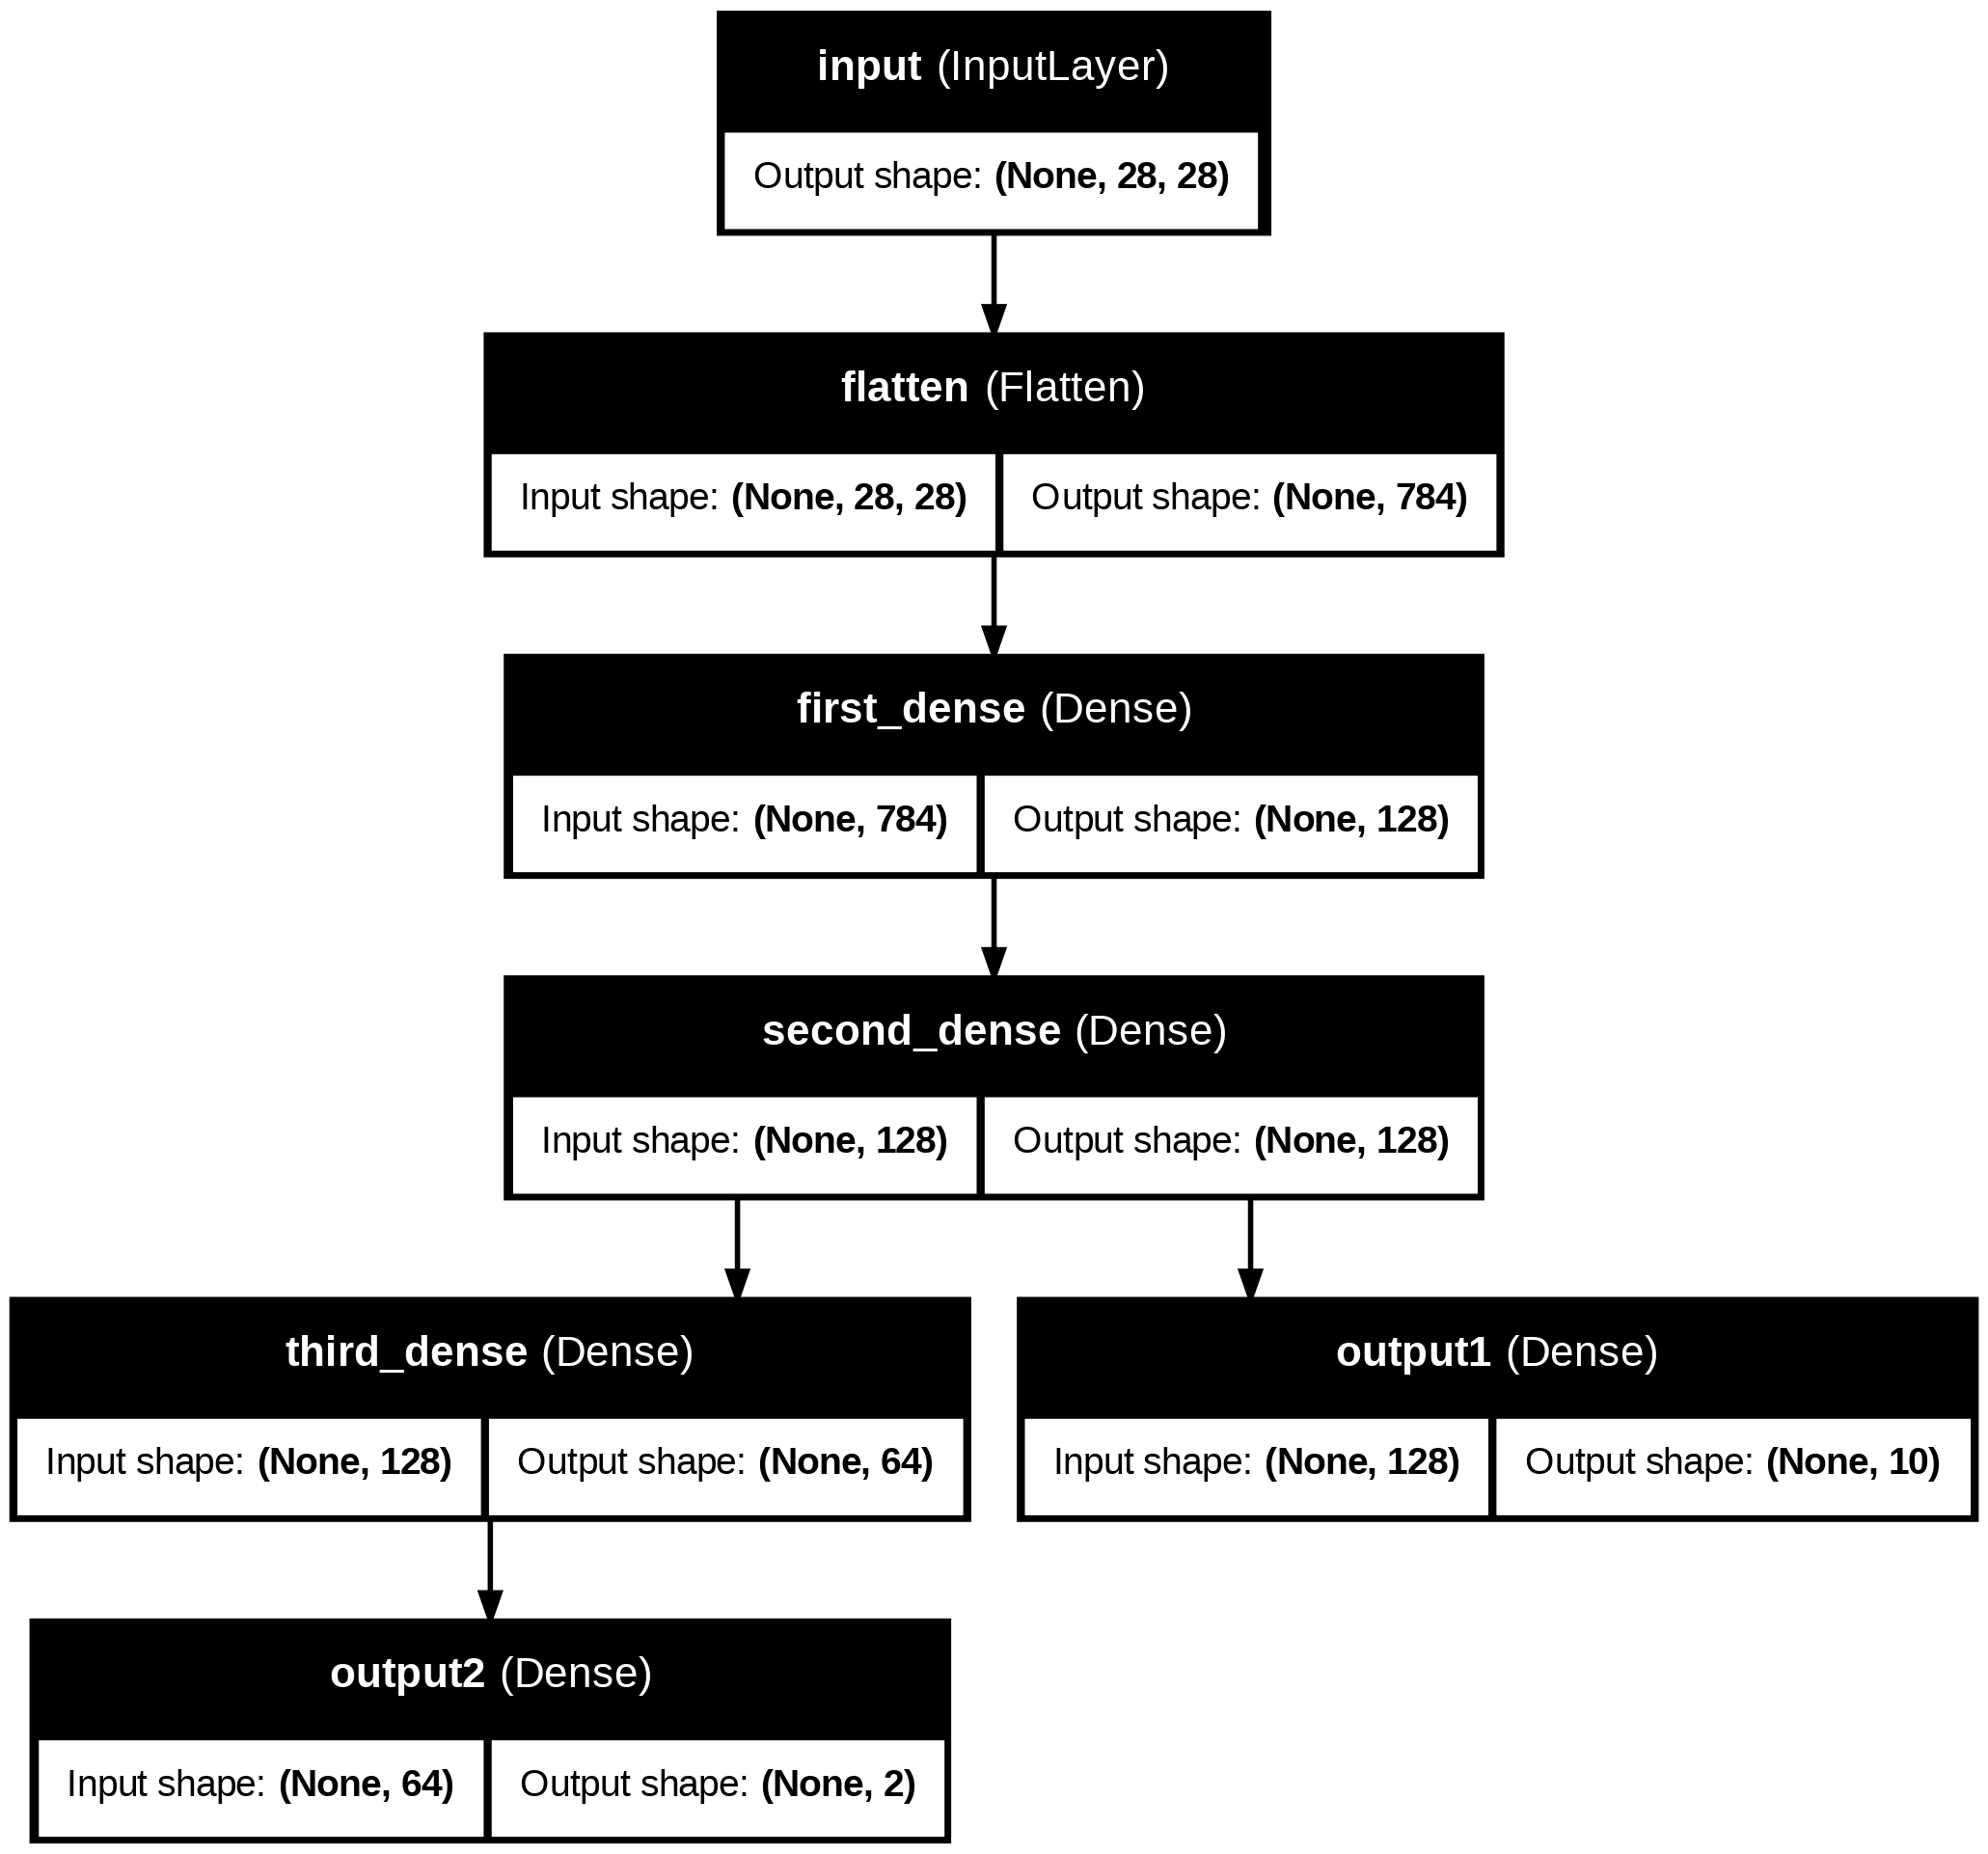

In [4]:
input = Input(shape=(28, 28), name="input")

x = Flatten(name="flatten")(input)
x = Dense(128, activation="relu", name="first_dense")(x)
x = Dense(128, activation="relu", name="second_dense")(x)

predictions1 = Dense(10, activation="softmax", name='output1')(x)
x = Dense(64, activation="relu", name="third_dense")(x)
predictions2 = Dense(2, activation="softmax", name='output2')(x)

multi_output_model = Model(inputs = input, outputs = [predictions1, predictions2])

multi_output_model.summary()

plot_model(multi_output_model, show_shapes=True, show_layer_names=True)

In this model, there are 2 outputs.

*   the flatten layer has 784 = 28*28 parameters, as before.
*   first dense layer has 100480 = 128 * (784+1) parameters.
*   second dense layer has 16512 = 128 * (128+1) parameters.
*   output1 has 10 neurons (classes), so there are 1290 = 10 * (128+1) parameters.
*   third dense layer has 8256 = 64 * (128+1) parameters.
*   output2 has 2 neurons and there are 2 * (64+1) = 130 parameters.





With compile(), one can use different loss functions and metrics for different outputs.

Note: If we want to use different optimisers for different outputs, then we have to manually train the model using GradientTape().

In [5]:
multi_output_model.compile(optimizer=tf.optimizers.Adam(),
              loss={'output1': 'sparse_categorical_crossentropy',
                    'output2': 'sparse_categorical_crossentropy'},
              metrics={'output1': 'sparse_categorical_crossentropy',
                       'output2': 'sparse_categorical_crossentropy'})

## Multiple inputs example

Multiple inputs is also possible.

Siamese network is a special case of a multiple inputs model. It takes two inputs and passes them through a shared network to compare them.



1.   Define the base network. (Same architecture and same weights to be used by both inputs.)
2.   Build the Siamese network by putting both outputs from the base network.

Dropout prevents overfitting by randomly deactivating (dropping) a fraction of neurons during training. It does not remove the neurons, but set the neurons to 0.

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_dense (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_dropout (Dropout)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_dense (Dense)                 │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_dropout (Dropout)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ third_dense (Dense)                  │ (None, 128)                 │          16,512 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

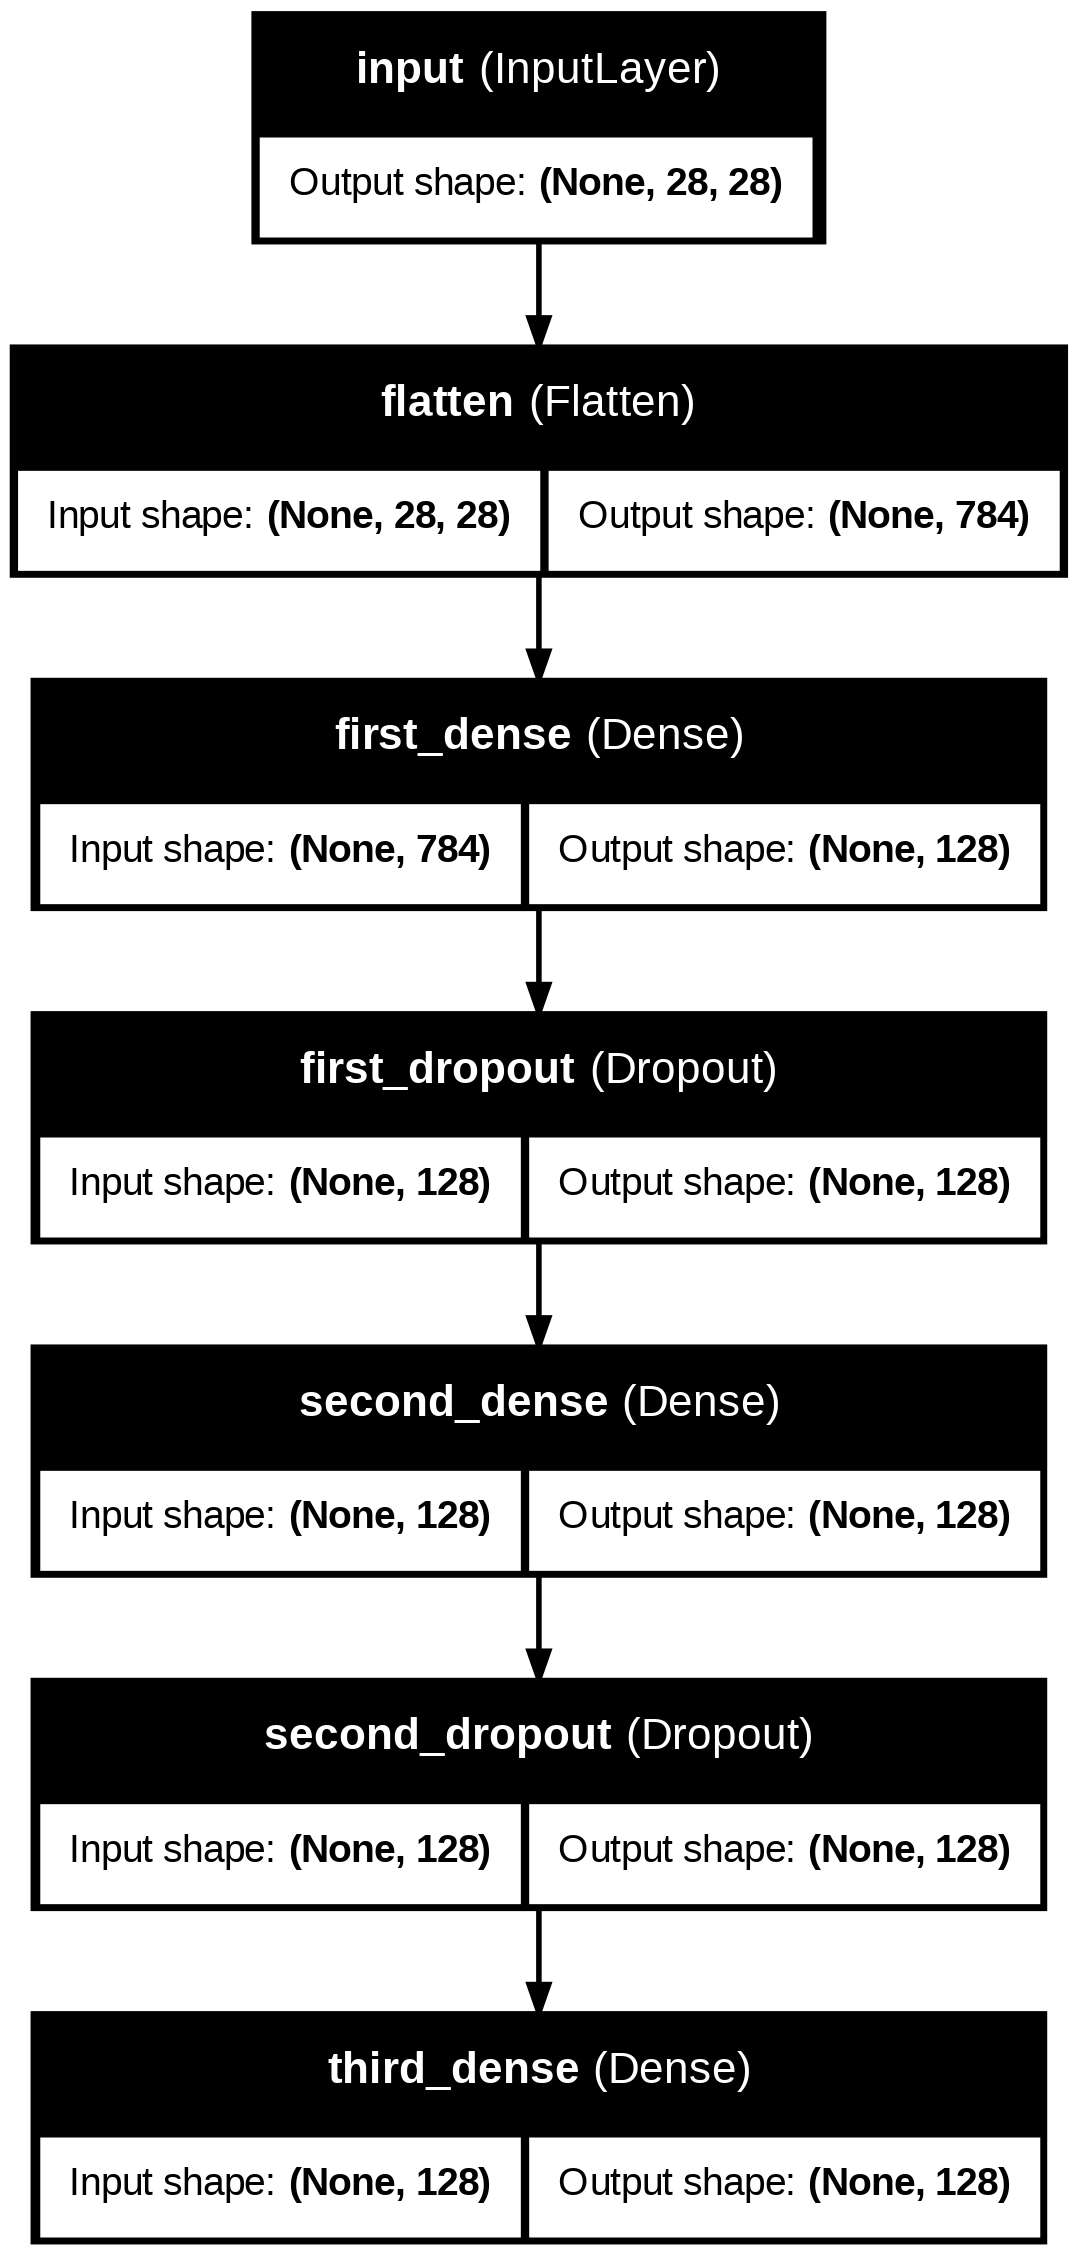

In [6]:
from tensorflow.keras.layers import Dropout

input = Input(shape=(28,28,), name="input")
x = Flatten(name="flatten")(input)
x = Dense(128, activation='relu', name="first_dense")(x)
x = Dropout(0.1, name="first_dropout")(x)
x = Dense(128, activation='relu', name="second_dense")(x)
x = Dropout(0.1, name="second_dropout")(x)
x = Dense(128, activation='relu', name="third_dense")(x)

base_network = Model(inputs=input, outputs=x)

base_network.summary()

plot_model(base_network, show_shapes=True, show_layer_names=True)

A Lambda layer in Keras is used to apply a custom function as part of the model. Here we use the Euclidean distance.

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_5 (Functional) │ (None, 128)            │        133,504 │ input1[0][0],          │
│                           │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional_5[0][0],    │
│                           │                        │                │ functional_5[1][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

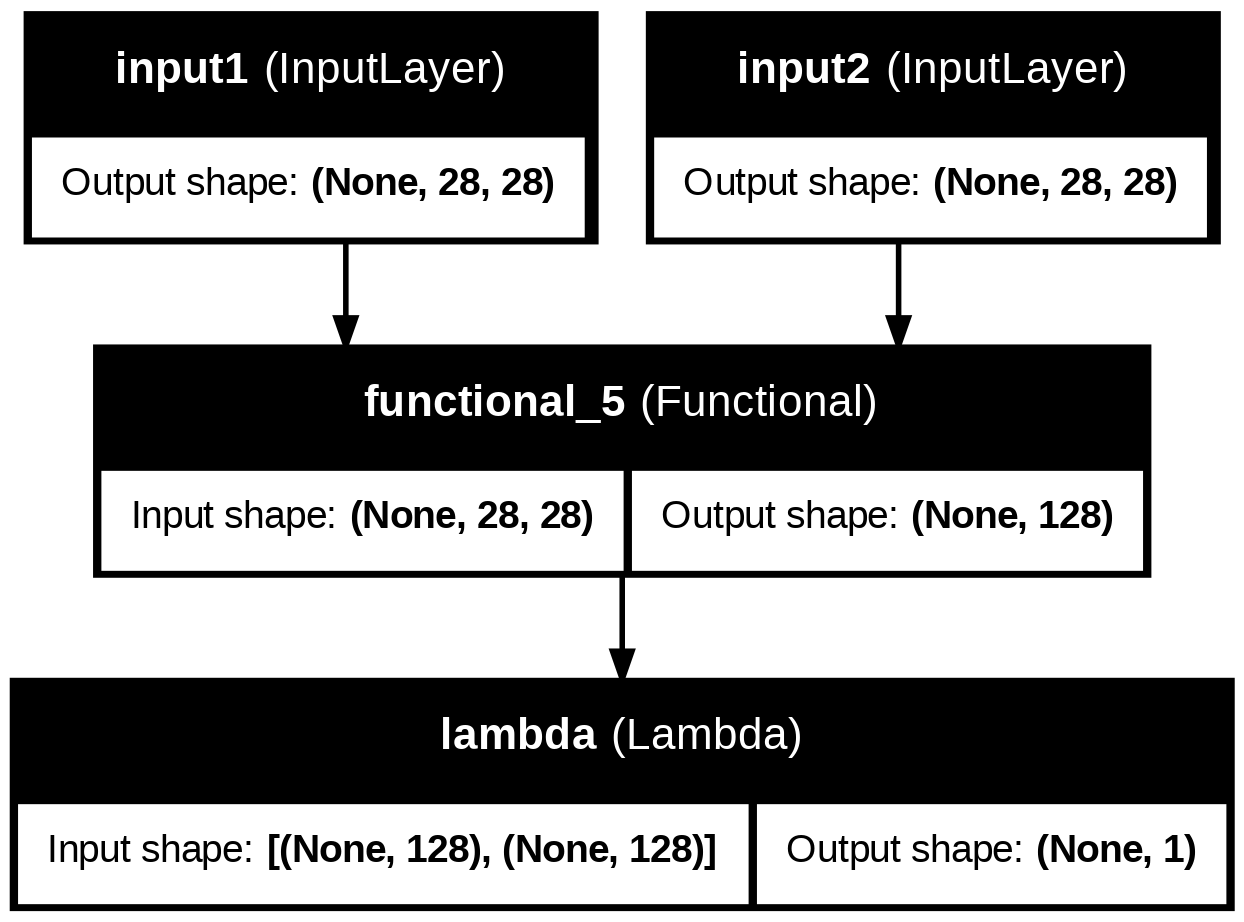

In [7]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

input1 = Input(shape=(28,28,), name="input1")
output1 = base_network(input1)

input2 = Input(shape=(28,28,), name="input2")
output2 = base_network(input2)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

output = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([output1, output2])

multi_input_model = Model([input1, input2], output)

multi_input_model.summary()

plot_model(multi_input_model, show_shapes=True, show_layer_names=True)

Finally, we want to train the model. Here we use contrastive_loss_with_margin as the loss function.

For the inputs, they come in pairs. In this example, the left part is tr_pairs[:,0], and the right part is tr_pairs[:,1].

The labels are tr_y.

In [8]:
from tensorflow.keras.optimizers import RMSprop

def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss


multi_input_model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=RMSprop())

#multi_input_model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y,
#                      epochs=20,
#                      batch_size=128,
#                      validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))